1)	FRESH: annual spending (m.u.) on fresh products (Continuous);

2)	MILK: annual spending (m.u.) on milk products (Continuous);

3)	GROCERY: annual spending (m.u.)on grocery products (Continuous);

4)	FROZEN: annual spending (m.u.)on frozen products (Continuous)

5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);

7)	CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)

8)	REGION: customers Region â€“ Lisnon, Oporto or Other (Nominal)
Descriptive Statistics:

In [ ]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from scipy.stats import boxcox, shapiro, probplot
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
df = pd.read_csv('/content/Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
df.Region=df.Region.map({3:'Other',2:'Lisbon',1:'Oporto'})

In [ ]:
df.Channel=df.Channel.map({1:'Horeca',2:'Retail'})

In [ ]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Horeca,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,Horeca,Other,29703,12051,16027,13135,182,2204
436,Horeca,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,Horeca,Other,10290,1981,2232,1038,168,2125


In [ ]:
print(df.Region.value_counts())
print(df.Channel.value_counts())

Other     316
Oporto     77
Lisbon     47
Name: Region, dtype: int64
Horeca    298
Retail    142
Name: Channel, dtype: int64


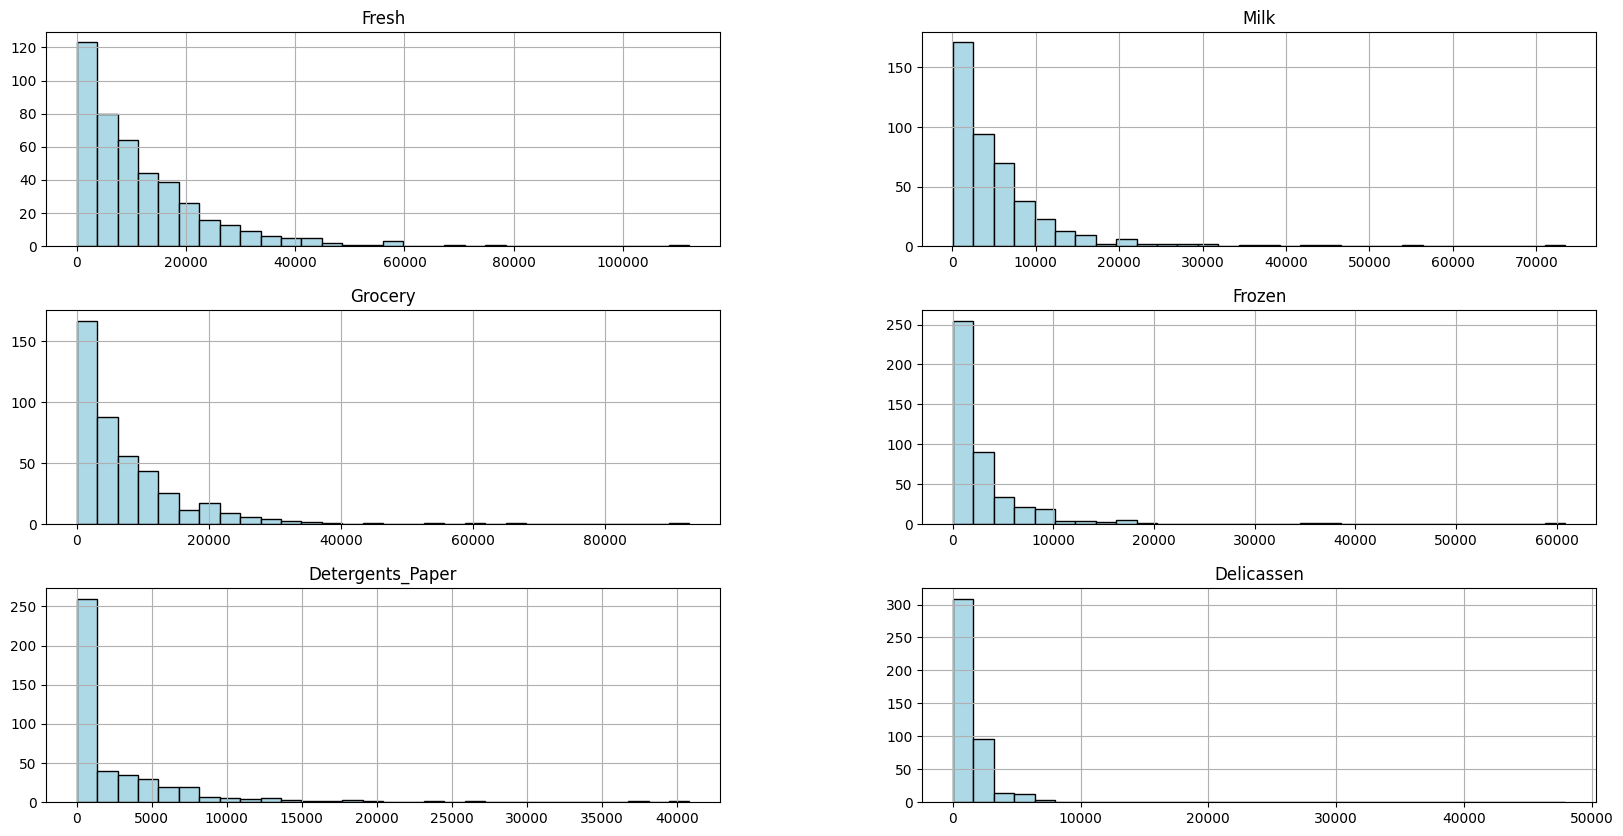

In [ ]:
df.hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black')
plt.show()

In [ ]:
data=df.copy()

lamb=[]
confidence=[]
for i in data.columns[2:]:
    data[i], coef, conf=boxcox(data[i]+0.0000001, alpha=0.05)   #We add a tiny constant as values need to be positive
                                                                #for Box-Cox
    lamb.append(coef)
    confidence.append(conf)

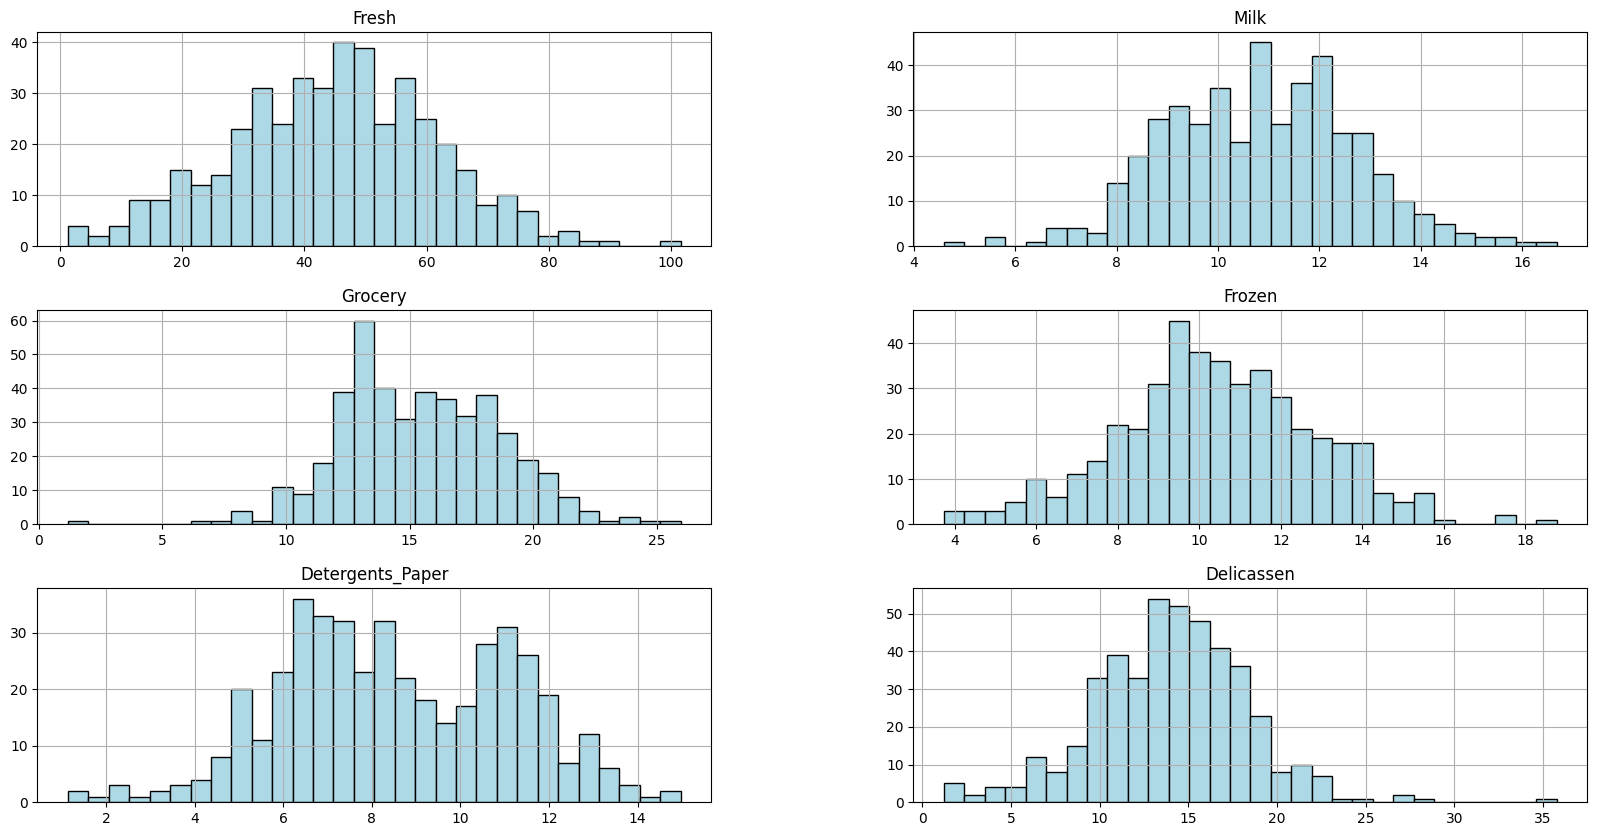

In [ ]:
data.hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black')
plt.show()

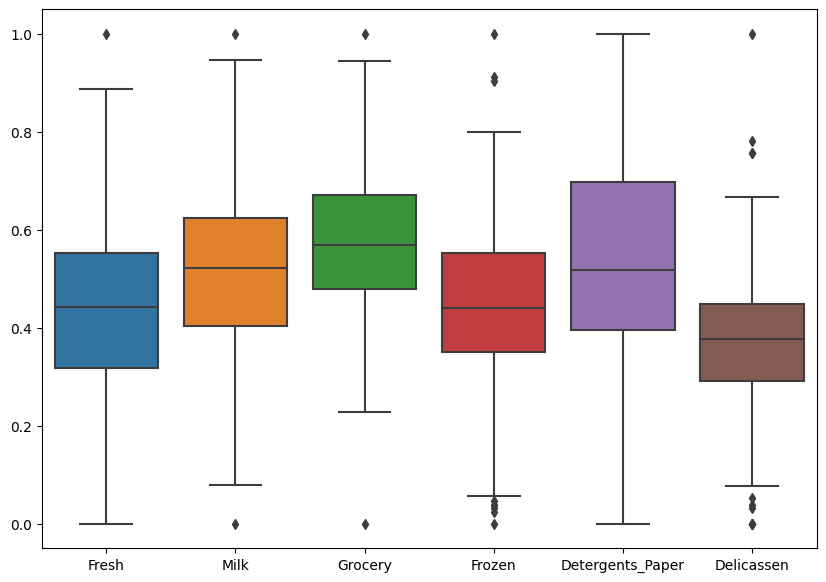

In [ ]:
norm=data.iloc[:,2:]

scaler=MinMaxScaler()
columns=data.columns[2:]
norm=scaler.fit_transform(data.iloc[:,2:])
norm=pd.DataFrame(norm, columns=columns)

plt.figure(figsize=(10,7))
sns.boxplot(data=norm)
plt.show()

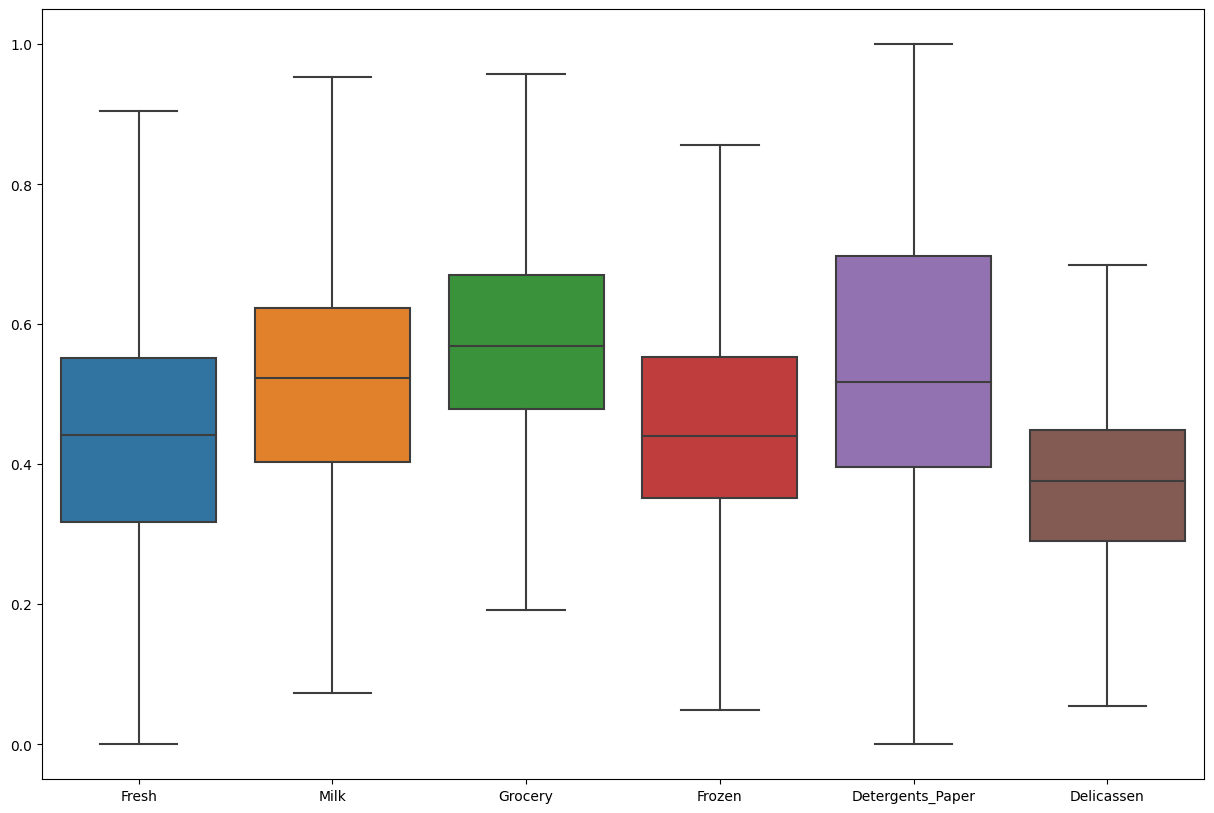

In [ ]:
for i in norm.columns:
    iqr=np.percentile(norm[i], 75)-np.percentile(norm[i], 25)
    per75=np.percentile(norm[i], 75)
    per25=np.percentile(norm[i], 25)
    norm[i]=np.where(norm[i]>per75+1.5*iqr, per75+1.5*iqr,norm[i] )
    norm[i]=np.where(norm[i]<per25-1.5*iqr, per25-1.5*iqr,norm[i] )

plt.figure(figsize=(15,10))
sns.boxplot(data=norm)
plt.show()

In [ ]:
normality=pd.DataFrame(index=['p-value', 'test-statistic'])
for i in norm.columns:
    normality[i]=shapiro(norm[i])

normality.T

,p-value,test-statistic
Fresh,0.997202,0.662730
Milk,0.996520,0.459561
Grocery,0.992466,0.025724
Frozen,0.995659,0.264255
Detergents_Paper,0.985208,0.000185
Delicassen,0.992554,0.027444


In [ ]:
data=pd.get_dummies(data=df, columns= ['Region','Channel'], drop_first=True)

#Uniting our categorical dummified variables with numerical normalized data.

data.iloc[:,:6]=norm

In [ ]:
data.shape

(440, 10)

In [ ]:
elbow_results=[]
for i in range(2,10):
    kmeans=KMeans(init='k-means++' , n_clusters=i, random_state=0)
    results=cross_validate(kmeans, data, cv=5)
    elbow_results.append(results['test_score'].mean()*-1)

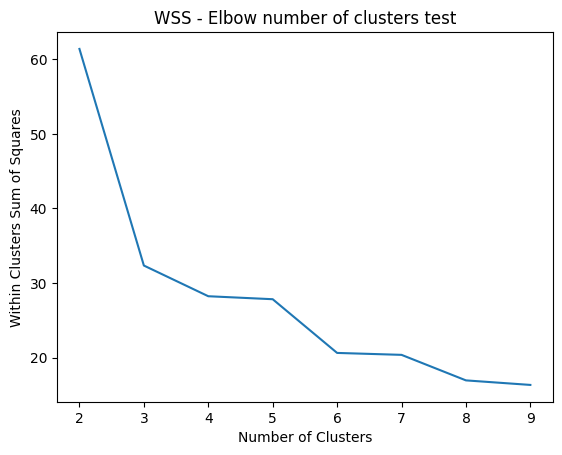

In [ ]:
plt.plot(range(2,len(elbow_results)+2) , elbow_results)
plt.title('WSS - Elbow number of clusters test')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares')
plt.show()

In [ ]:
kmeans=KMeans(init='k-means++' , n_clusters=3, random_state=0)

cluster_model=kmeans.fit(data)


df['clusters']=cluster_model.predict(data).astype('str')

data['clusters']=df['clusters']

In [ ]:
pca=PCA(n_components=len(data.columns)-1)

pca.fit(data.iloc[:,:-1])

pca.explained_variance_ratio_

array([0.43475419, 0.3627994 , 0.06304534, 0.05522108, 0.0336834 ,
       0.02176789, 0.01480611, 0.00983244, 0.00409015])

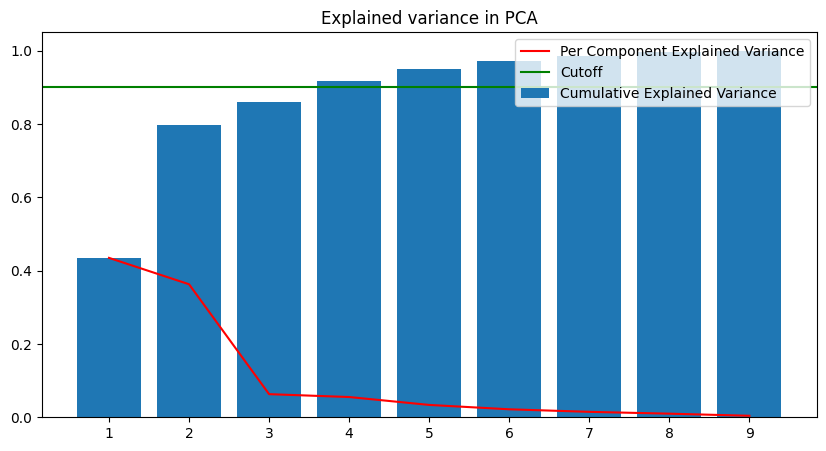

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,10),pca.explained_variance_ratio_, c='red', label='Per Component Explained Variance')
plt.bar(range(1,10), height=np.cumsum(pca.explained_variance_ratio_), label='Cumulative Explained Variance')
plt.axhline(y=0.9, c='g', label='Cutoff')
plt.title('Explained variance in PCA')
plt.xticks(range(1,10))
plt.legend(loc=1)
plt.show()

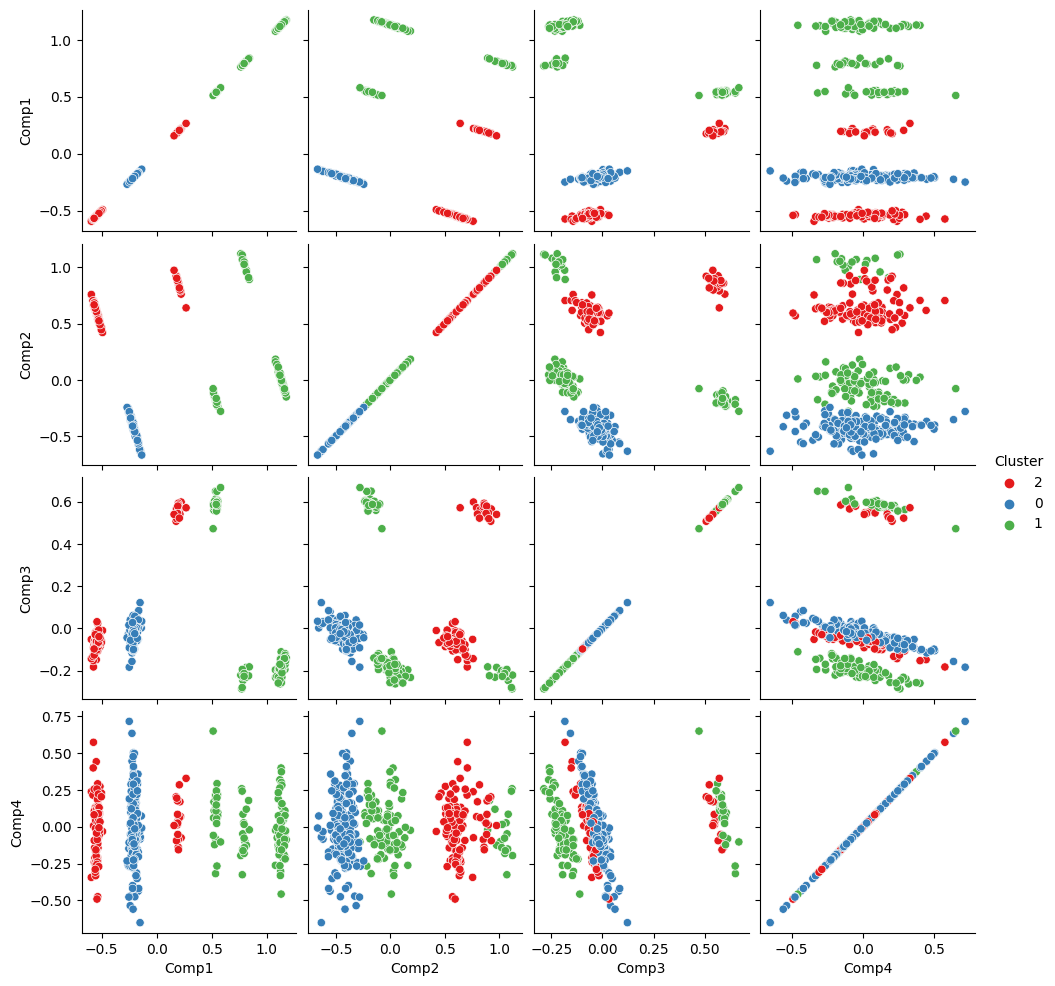

In [ ]:
pca=PCA(n_components=4)
reduced=pca.fit_transform(data.iloc[:,:-1])

reduced=pd.DataFrame(np.column_stack([reduced, data.clusters]), columns=['Comp1','Comp2','Comp3','Comp4','Cluster'])

sns.pairplot(reduced, hue='Cluster', diag_kind=None, vars=reduced.columns[0:-1], palette='Set1')
plt.show()

<Figure size 1000x1000 with 0 Axes>

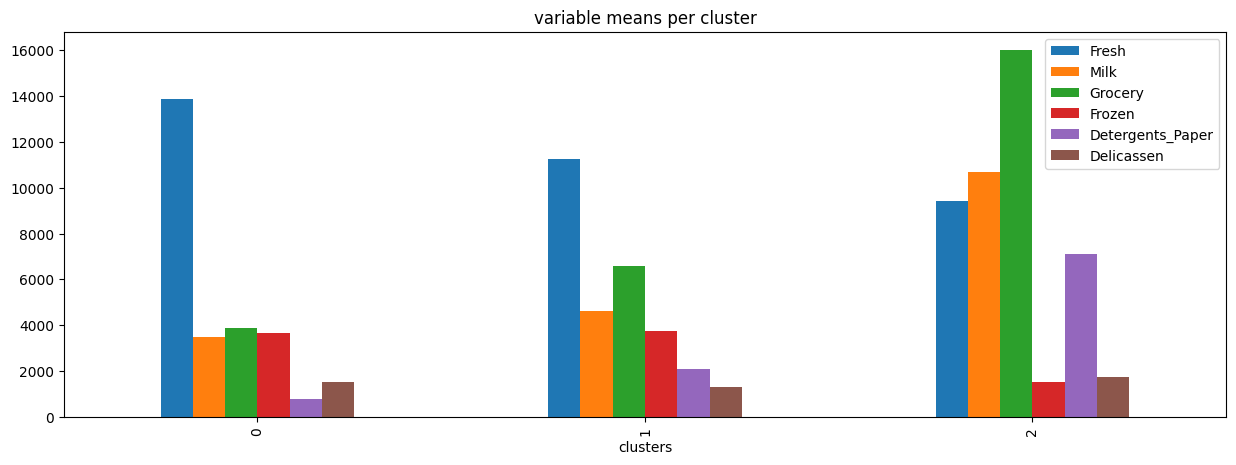

In [ ]:
means=df.iloc[:,2:].groupby('clusters').mean()


plt.figure(figsize=(10,10))
means.groupby('clusters').mean().plot(kind='bar', figsize=(15,5))
plt.title('variable means per cluster')
plt.show()

In [ ]:
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_Oporto,Region_Other,Channel_Retail,clusters
0,0.503006,0.667729,0.625853,0.209882,0.651772,0.412310,0,1,1,2
1,0.415768,0.670149,0.656101,0.459175,0.676366,0.445609,0,1,1,2
2,0.401635,0.653724,0.627898,0.500109,0.684170,0.653077,0,1,1,2
3,0.510520,0.369822,0.554765,0.636671,0.466264,0.446423,0,1,0,0
4,0.605605,0.580881,0.619646,0.566556,0.604411,0.589224,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...
435,0.660299,0.701846,0.725654,0.744727,0.361050,0.472236,0,1,0,0
436,0.720826,0.393806,0.374452,0.586399,0.295604,0.480143,0,1,0,0
437,0.525725,0.741097,0.817825,0.289095,0.863870,0.451674,0,1,1,2
438,0.470257,0.438030,0.482897,0.392116,0.353105,0.467657,0,1,0,0


In [ ]:
import plotly.express as px
from sklearn.cluster import KMeans

# Assuming "data" is your DataFrame containing the columns "Fresh," "Milk," and "Grocery"
# Access the columns from the DataFrame
fresh = data['Fresh']
milk = data['Milk']
grocery = data['Grocery']

# Create a 3D scatter plot with cluster-based coloring
fig = px.scatter_3d(data, x='Fresh', y='Milk', z='Grocery', color='clusters')

# Set labels for the axes
fig.update_layout(scene=dict(xaxis_title='Fresh', yaxis_title='Milk', zaxis_title='Grocery'))

# Set title for the plot
fig.update_layout(title='3D Scatter Plot with Clustering')

# Display the plot
fig.show()


In [ ]:
import plotly.express as px
from sklearn.cluster import KMeans

# Assuming "data" is your DataFrame containing the columns "Frozen," "Detergents_Paper," and "Delicassen"
# Access the columns from the DataFrame
frozen = data['Frozen']
detergents_paper = data['Detergents_Paper']
delicassen = data['Delicassen']

# Perform clustering on the data
n_clusters = 3  # Specify the number of clusters you want to create
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(data[['Frozen', 'Detergents_Paper', 'Delicassen']])

# Create a DataFrame with the data and cluster labels
clustered_data = data.copy()
clustered_data['clusters'] = clusters

# Create a 3D scatter plot with cluster-based coloring
fig = px.scatter_3d(clustered_data, x='Frozen', y='Detergents_Paper', z='Delicassen', color='clusters')

# Set labels for the axes
fig.update_layout(scene=dict(xaxis_title='Frozen', yaxis_title='Detergents_Paper', zaxis_title='Delicassen'))

# Set title for the plot
fig.update_layout(title='3D Scatter Plot with Clustering')

# Display the plot
fig.show()


In [ ]:
import plotly.express as px

# Assuming "data" is your DataFrame containing the columns "Frozen," "Detergents_Paper," "Delicassen," and "clusters"
# Access the columns from the DataFrame
frozen = data['Frozen']
detergents_paper = data['Detergents_Paper']
delicassen = data['Delicassen']
clusters = data['clusters']

# Create a 3D scatter plot with cluster-based coloring
fig = px.scatter_3d(data, x='Frozen', y='Detergents_Paper', z='Delicassen', color='clusters')

# Set labels for the axes
fig.update_layout(scene=dict(xaxis_title='Frozen', yaxis_title='Detergents_Paper', zaxis_title='Delicassen'))

# Set title for the plot
fig.update_layout(title='3D Scatter Plot with Clustering')

# Display the plot
fig.show()
